In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [39]:
# Step 1: Load dataset
url = "https://raw.githubusercontent.com/health-data-science-OR/hpdm139-datasets/main/wisconsin.csv"
df = pd.read_csv(url, index_col='id')
print("Dataset Preview:\n", df.head())

Dataset Preview:
           Unnamed: 0 diagnosis  radius_mean  texture_mean  perimeter_mean  \
id                                                                          
842302             0         M        17.99         10.38          122.80   
842517             1         M        20.57         17.77          132.90   
84300903           2         M        19.69         21.25          130.00   
84348301           3         M        11.42         20.38           77.58   
84358402           4         M        20.29         14.34          135.10   

          area_mean  smoothness_mean  compactness_mean  concavity_mean  \
id                                                                       
842302       1001.0          0.11840           0.27760          0.3001   
842517       1326.0          0.08474           0.07864          0.0869   
84300903     1203.0          0.10960           0.15990          0.1974   
84348301      386.1          0.14250           0.28390          0.2414  

In [40]:
df.columns

Index(['Unnamed: 0', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [41]:
# Step 2: Encode diagnosis (Malignant = 1, Benign = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
y = df['diagnosis']
X = df.drop(['diagnosis', 'Unnamed: 0'], axis=1)

In [42]:
# Step 3: Handle missing values if any
X = X.fillna(X.mean())

In [43]:
# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Step 5: Apply PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.44272026 0.18971182]


In [45]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [46]:
# Step 7: Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
# Step 8: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy after PCA:", accuracy_score(y_test, y_pred))

Accuracy after PCA: 0.9707602339181286


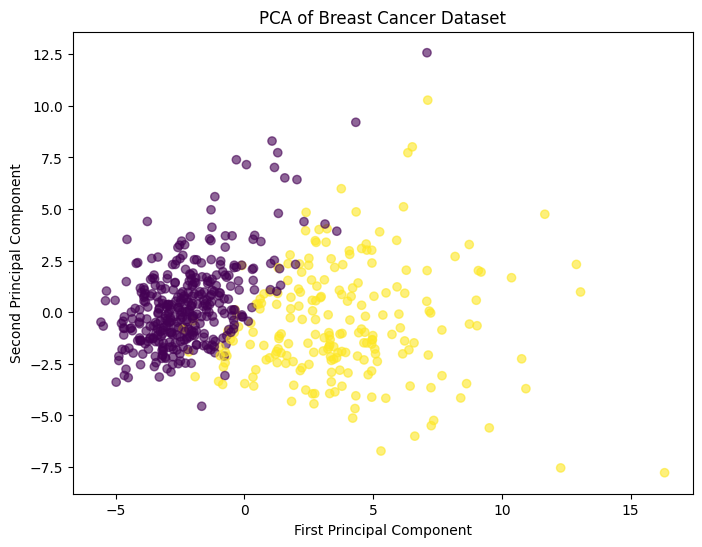

In [48]:
# Step 9: Visualize PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

In [49]:
# Step 10: Predict for new patient
new_patient = [[15.0, 20.0, 70.0, 800.0, 0.1, 0.2, 0.3, 0.1, 0.2, 0.1,
                0.5, 0.6, 0.7, 1000.0, 0.05, 0.15, 0.25, 0.05, 0.15, 0.05,
                20.0, 25.0, 80.0, 1200.0, 0.12, 0.22, 0.32, 0.12, 0.22, 0.12]]

In [50]:
# Validate input size
if len(new_patient[0]) != X.shape[1]:
    print(f"Error: Expected {X.shape[1]} features, but got {len(new_patient[0])}.")
else:
    new_scaled = scaler.transform(new_patient)
    new_pca = pca.transform(new_scaled)
    prediction = model.predict(new_pca)
    print("Prediction for new patient:", "Malignant" if prediction[0] == 1 else "Benign")

Prediction for new patient: Malignant


/Users/soycheeto/Desktop/ds/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
